In [1]:
import albumentations as A
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

## Renaming classes

In [7]:
class_labels = ['c4', 'c2', 'b20', 'c12', 'a7']


labels_path = 'znaki_wydrukowane copy/labels'
labels = os.listdir(labels_path)

for label_file in labels:
    lines = []
    with open(os.path.join(labels_path, label_file)) as file:
        for line in file.readlines():
            class_idx, x, y, w, h = list(map(lambda x: float(x), line.split(' ')))

            if class_idx == 0:
                class_idx = 2
            elif class_idx == 2:
                class_idx = 0


        lines.append(" ".join(map(lambda x: str(x), [class_idx, x, y, w, h])))

    with open(os.path.join(labels_path, label_file), 'w+') as file:
        file.writelines(lines)


## Displaying an image

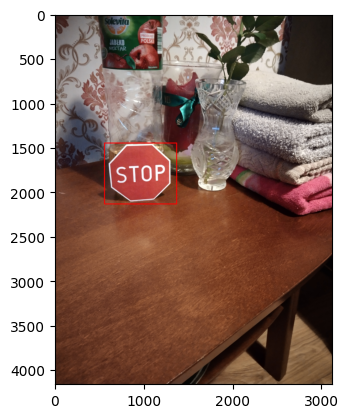

In [22]:
image_path = 'znaki_wydrukowane copy/train'
images = os.listdir(image_path)

idx = np.random.randint(0, len(images)-1)
image = images[idx]

f_name = image.split('.')[0]

img = cv2.imread(os.path.join(image_path, image))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height, width, _ = img.shape

bboxes = []

with open(os.path.join(labels_path, f_name+'.txt')) as f:
    for line in f.readlines():
        class_idx, x, y, w, h = list(map(lambda x: float(x), line.split(' ')))
        bbox = [x, y, w, h, class_labels[int(class_idx)]]
        bboxes.append(bbox)

cv2.rectangle(img, 
                tuple(np.multiply(np.subtract(bbox[:2], np.divide(bbox[2:4], 2)), [width, height]).astype(int)),
                tuple(np.multiply(np.add(bbox[:2], np.divide(bbox[2:4], 2)), [width, height]).astype(int)),
                (255,0,0), 10)

plt.imshow(img)